In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df = pd.read_csv("/content/ниссс - table-6f05ffc6-c90b-4080-97b8-1c6006797446-10.csv (2).csv", thousands=",", decimal=",")


def clean_col(col):
    return (
        df[col]
        .astype(str)
        .str.replace("–", "-")
        .str.replace(",", ".")
        .replace("—", np.nan)
        .astype(float)
    )

cols_to_clean = [
    "H (Налоговая прибыль, млрд руб.)",
    "В (ВРП, трлн руб.)",
    "И (Инвестиции, млрд руб.)",
    "Б (Бюджетная самодостаточность, %)",
    "U (Уровень безработицы, %)",
    "Pбедн (тыс. чел.)",
    "Iдоступ (индекс доступности благ)",
    "G (Коэффициент Джини)",
    "T (Транспортная доступность, баллы*)",
    "E (Энергобезопасность, индекс*)",
    "D (Оборонное значение, баллы*)",
    "S (Сырьевая безопасность, индекс*)",
    "A (Агропромышленный потенциал, тыс. тонн зерна в год*)",
    "Население",
    "W (средняя з/п, тыс. руб.)",
    "Pбедн_доля (%)",
    "R (уровень диверсификации экономики)",
    "T (политическая активность населения)",
    "M (уровень миграционного оттока, тыс. чел.)",
    "C (плотность населения, чел/км²)",
    "G (уровень зависимости от дотаций, млрд руб.)",
    "E (доля с ВО, %)"
]

for col in cols_to_clean:
    df[col] = clean_col(col)

In [53]:
a0, a1, a2, a3, a4, a5 = 0, 0.3, 0.2, 0.2, 0.2, 0.1
b0, b1, b2, b3, b4 = 0, 0.3, 0.2, 0.2, 0.1
c0, c1, c2, c3, c4, c5 = 0, 0.25, 0.2, 0.3, 0.15, 0.1

df["ЭЭ"] = (
    a0 +
    a1 * df["H (Налоговая прибыль, млрд руб.)"] +
    a2 * df["В (ВРП, трлн руб.)"] +
    a3 * df["И (Инвестиции, млрд руб.)"] +
    a4 * df["Б (Бюджетная самодостаточность, %)"] +
    a5 * (1 - df["U (Уровень безработицы, %)"])
)

df["СС"] = (
    b0 +
    b1 * df["G (Коэффициент Джини)"] +
    b2 * df["W (средняя з/п, тыс. руб.)"] +
    b3 * df["E (доля с ВО, %)"] +
    b4 * df["Pбедн_доля (%)"]
)

df["ССт"] = (
    c0 +
    c1 * df["G (уровень зависимости от дотаций, млрд руб.)"] +
    c2 * df["R (уровень диверсификации экономики)"] +
    c3 * df["T (политическая активность населения)"] +
    c4 * df["M (уровень миграционного оттока, тыс. чел.)"] +
    c5 * df["C (плотность населения, чел/км²)"]
)

In [54]:
def f1(x): return np.log(1 + x) if x >= 0 else np.nan
def f2(x): return np.log(1 + x) if x >= 0 else np.nan
def f3(x): return np.sqrt(x) if x >= 0 else np.nan
def f4(x): return x / (1 + x) if x >= 0 else np.nan
def f5(x): return (1 - x) / (1 + (1 - x)) if x >= 0 and x <= 1 else np.nan
def f6(x): return 1 / (1 + x) if x >= 0 else np.nan

df["1_f1_H"] = df["H (Налоговая прибыль, млрд руб.)"].apply(f1)
df["1_f2_В"] = df["В (ВРП, трлн руб.)"].apply(f2)
df["1_f3_И"] = df["И (Инвестиции, млрд руб.)"].apply(f3)
df["1_f4_Б"] = df["Б (Бюджетная самодостаточность, %)"].apply(f4)
df["1_f5_U"] = df["U (Уровень безработицы, %)"].apply(f5)

df["2_f6_D"] = df["G (Коэффициент Джини)"].apply(f6)
df["2_f2_V"] = df["W (средняя з/п, тыс. руб.)"].apply(f1)
df["2_f3_E"] = df["E (доля с ВО, %)"].apply(f3)
df["2_f4_P"] = df["Pбедн_доля (%)"].apply(f6)

df["3_f1_H"] = df["G (уровень зависимости от дотаций, млрд руб.)"].apply(f6)
df["3_f2_В"] = df["R (уровень диверсификации экономики)"].apply(f1)
df["3_f3_И"] = df["T (политическая активность населения)"].apply(f3)
df["3_f4_Б"] = df["M (уровень миграционного оттока, тыс. чел.)"].apply(f6)
df["3_f5_U"] = df["C (плотность населения, чел/км²)"].apply(f1)

In [55]:
df.head()

,№,Регион,Год,"H (Налоговая прибыль, млрд руб.)","В (ВРП, трлн руб.)","И (Инвестиции, млрд руб.)","Б (Бюджетная самодостаточность, %)","U (Уровень безработицы, %)",Pбедн (тыс. чел.),Iдоступ (индекс доступности благ),...,1_f5_U,2_f6_D,2_f2_V,2_f3_E,2_f4_P,3_f1_H,3_f2_В,3_f3_И,3_f4_Б,3_f5_U
0,1.0,Москва,2020.0,192.0,169.0,2400.0,118.0,62.0,149.0,NaN,...,NaN,0.034483,4.595120,6.480741,0.008475,1.0,11.863674,6.403124,NaN,8.533263
1,2.0,Москва,2021.0,231.0,179.0,2600.0,122.0,45.0,135.0,NaN,...,NaN,0.035714,4.672829,6.557439,0.009346,1.0,11.886225,6.557439,NaN,8.533263
2,3.0,Москва,2022.0,258.0,185.0,2700.0,126.0,39.0,127.0,92.1,...,NaN,0.037037,4.753590,6.633250,0.010526,1.0,11.890999,6.633250,NaN,8.533263
3,4.0,Москва,2023.0,270.0,193.0,2800.0,128.0,38.0,120.0,93.5,...,NaN,0.038462,4.828314,6.708204,0.010526,1.0,11.885034,6.708204,NaN,8.533263
4,1.0,Санкт-Петербург,2020.0,78.0,39.0,520.0,86.0,64.0,195.0,NaN,...,NaN,0.031250,4.007333,6.164414,0.002762,1.0,11.800613,6.082763,NaN,8.256088


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

features_ee = ["1_f1_H", "1_f2_В", "1_f3_И", "1_f4_Б", "1_f5_U"]
X_ee = df[features_ee]
y_ee = df["ЭЭ"]

mask_ee = ~y_ee.isna()
X_ee = X_ee[mask_ee]
y_ee = y_ee[mask_ee]

imputer_ee = IterativeImputer(max_iter=10, random_state=0)
X_ee_imp = imputer_ee.fit_transform(X_ee)

model_ee = LinearRegression()
model_ee.fit(X_ee_imp, y_ee)


features_ss = ["2_f6_D", "2_f2_V", "2_f3_E", "2_f4_P"]
X_ss = df[features_ss]
y_ss = df["СС"]


mask_ss = ~y_ss.isna()
X_ss = X_ss[mask_ss]
y_ss = y_ss[mask_ss]

imputer_ss = IterativeImputer(max_iter=10, random_state=0)
X_ss_imp = imputer_ss.fit_transform(X_ss)

model_ss = LinearRegression()
model_ss.fit(X_ss_imp, y_ss)


features_st = ["3_f1_H", "3_f2_В", "3_f3_И", "3_f4_Б", "3_f5_U"]
X_st = df[features_st]
y_st = df["ССт"]


mask_st = ~y_st.isna()
X_st = X_st[mask_st]
y_st = y_st[mask_st]

imputer_st = IterativeImputer(max_iter=10, random_state=0)
X_st_imp = imputer_st.fit_transform(X_st)

model_st = LinearRegression()
model_st.fit(X_st_imp, y_st)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LinearRegression()

In [57]:
X_ee_imp = imputer_ee.fit_transform(df[features_ee])
df["ЭЭ_pred"] = model_ee.predict(X_ee_imp)

X_ss_imp = imputer_ss.fit_transform(df[features_ss])
df["СС_pred"] = model_ss.predict(X_ss_imp)

X_st_imp = imputer_st.fit_transform(df[features_st])
df["ССт_pred"] = model_st.predict(X_st_imp)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [58]:
INVESTMENT_BOOST = 0.1
MOSCOW_BOOST = -0.01

df["И_увеличенные"] = df["И (Инвестиции, млрд руб.)"].copy()

for i, row in df.iterrows():
    if row["Регион"] == "Москва":
        df.at[i, "И_увеличенные"] = df.at[i, "И (Инвестиции, млрд руб.)"] * (1 + MOSCOW_BOOST)
    else:
        df.at[i, "И_увеличенные"] = df.at[i, "И (Инвестиции, млрд руб.)"] * (1 + INVESTMENT_BOOST)

df["f3_И_увеличенный"] = df["И_увеличенные"].apply(f3)


X_new_ee = df[features_ee].copy()
X_new_ee["1_f3_И"] = df["f3_И_увеличенный"]
X_new_ee_imp = imputer_ee.transform(X_new_ee)
df["ЭЭ_новый"] = model_ee.predict(X_new_ee_imp)

X_new_ss = df[features_ss].copy()
X_new_ss["2_f2_V"] = df["W (средняя з/п, тыс. руб.)"].apply(f1)
X_new_ss_imp = imputer_ss.transform(X_new_ss)
df["СС_новый"] = model_ss.predict(X_new_ss_imp)

X_new_st = df[features_st].copy()
X_new_st["3_f3_И"] = df["f3_И_увеличенный"]
X_new_st_imp = imputer_st.transform(X_new_st)
df["ССт_новый"] = model_st.predict(X_new_st_imp)



/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [63]:

alpha, beta, gamma = 1/3, 1/3, 1/3
df["КЭР"] = alpha * df["ЭЭ_pred"] + beta * df["СС_pred"] + gamma * df["ССт_pred"]
df["КЭР_новый"] = alpha * df["ЭЭ_новый"] + beta * df["СС_новый"] + gamma * df["ССт_новый"]

df["delta_KER"] = df["КЭР_новый"] - df["КЭР"]
df["delta_I"] = df["И_увеличенные"] - df["И (Инвестиции, млрд руб.)"]
df["ME"] = df["delta_KER"] / df["delta_I"]


In [64]:
final_df = df[[
    "Регион", "Год",
    "H (Налоговая прибыль, млрд руб.)", "В (ВРП, трлн руб.)",
    "И (Инвестиции, млрд руб.)", "Б (Бюджетная самодостаточность, %)",
    "U (Уровень безработицы, %)", "Pбедн (тыс. чел.)",
    "ЭЭ_pred", "СС_pred", "ССт_pred", "КЭР", "КЭР_новый", "ME"
]]

final_df.to_csv("итог_КЭР_МЕ.csv", index=False)

In [65]:
def print_regression_weights(model, feature_names, model_name):
    print(f"\n Коэффициенты регрессии для {model_name}:")
    print(f"{model_name}_intercept = {model.intercept_:.4f}")
    for coef, name in zip(model.coef_, feature_names):
        print(f"{name:15} → {coef:.4f}")


features_ee = ["1_f1_H", "1_f2_В", "1_f3_И", "1_f4_Б", "1_f5_U"]
features_ss = ["2_f6_D", "2_f2_V", "2_f3_E", "2_f4_P"]
features_st = ["3_f1_H", "3_f2_В", "3_f3_И", "3_f4_Б", "3_f5_U"]

print_regression_weights(model_ee, features_ee, "ЭЭ")
print_regression_weights(model_ss, features_ss, "СС")
print_regression_weights(model_st, features_st, "ССт")


 Коэффициенты регрессии для ЭЭ:
ЭЭ_intercept = 3885.1939
1_f1_H          → 39.7673
1_f2_В          → 48.7126
1_f3_И          → 12.9172
1_f4_Б          → -4408.4054

 Коэффициенты регрессии для СС:
СС_intercept = 131.9613
2_f6_D          → -42.8929
2_f2_V          → 14.2236
2_f3_E          → -14.3363
2_f4_P          → -6113.6792

 Коэффициенты регрессии для ССт:
ССт_intercept = -63506.3017
3_f1_H          → 16065.2749
3_f2_В          → 6568.8497
3_f3_И          → 2160.0809
3_f4_Б          → -503.5579
3_f5_U          → -1712.3947


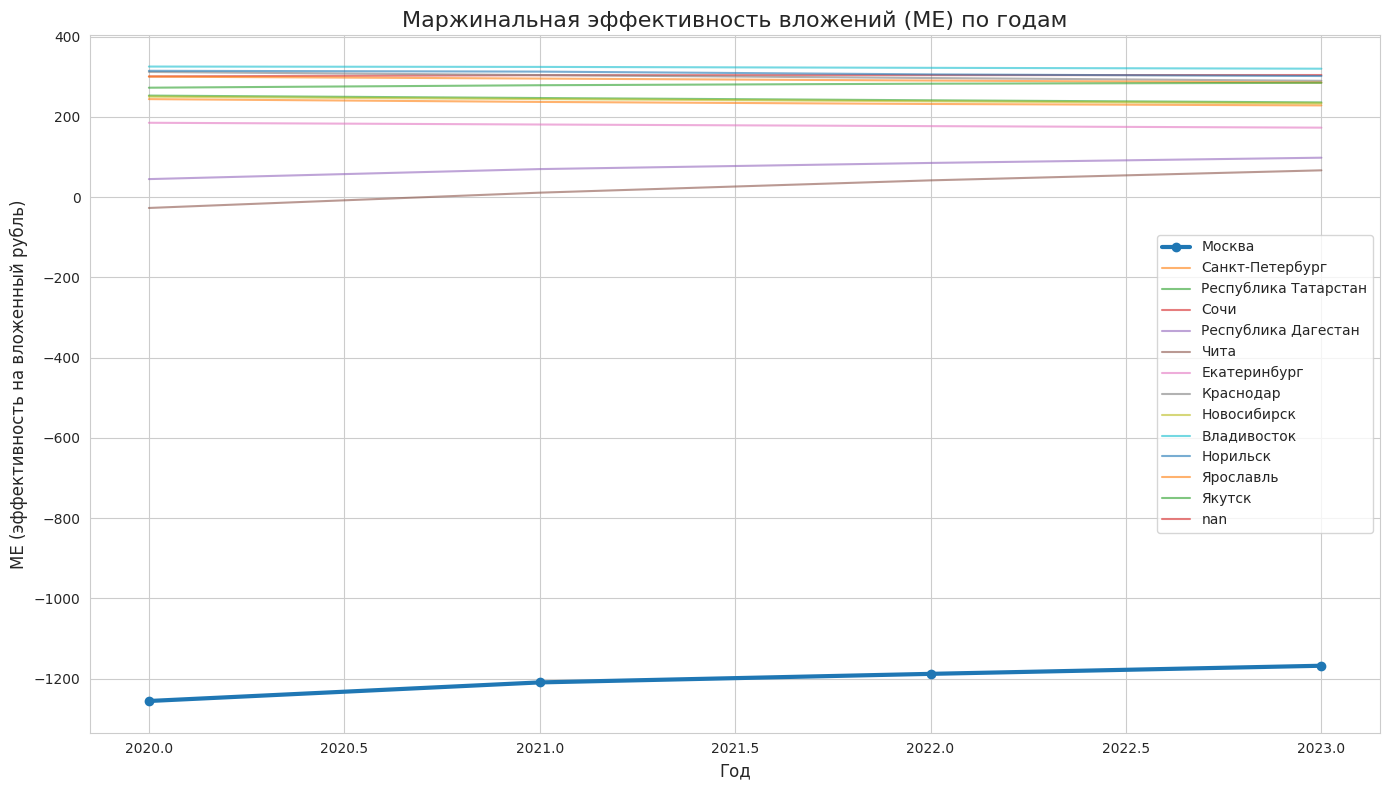

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values(by=["Регион", "Год"])

plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")
for region in df["Регион"].unique():
    subset = df[df["Регион"] == region]
    if region == "Москва":
        plt.plot(subset["Год"], subset["ME"], label=region, linewidth=3, linestyle="-", marker="o")
    else:
        plt.plot(subset["Год"], subset["ME"], label=region, alpha=0.6, linestyle="-")

plt.title("Маржинальная эффективность вложений (ME) по годам", fontsize=16)
plt.xlabel("Год", fontsize=12)
plt.ylabel("ME (эффективность на вложенный рубль)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

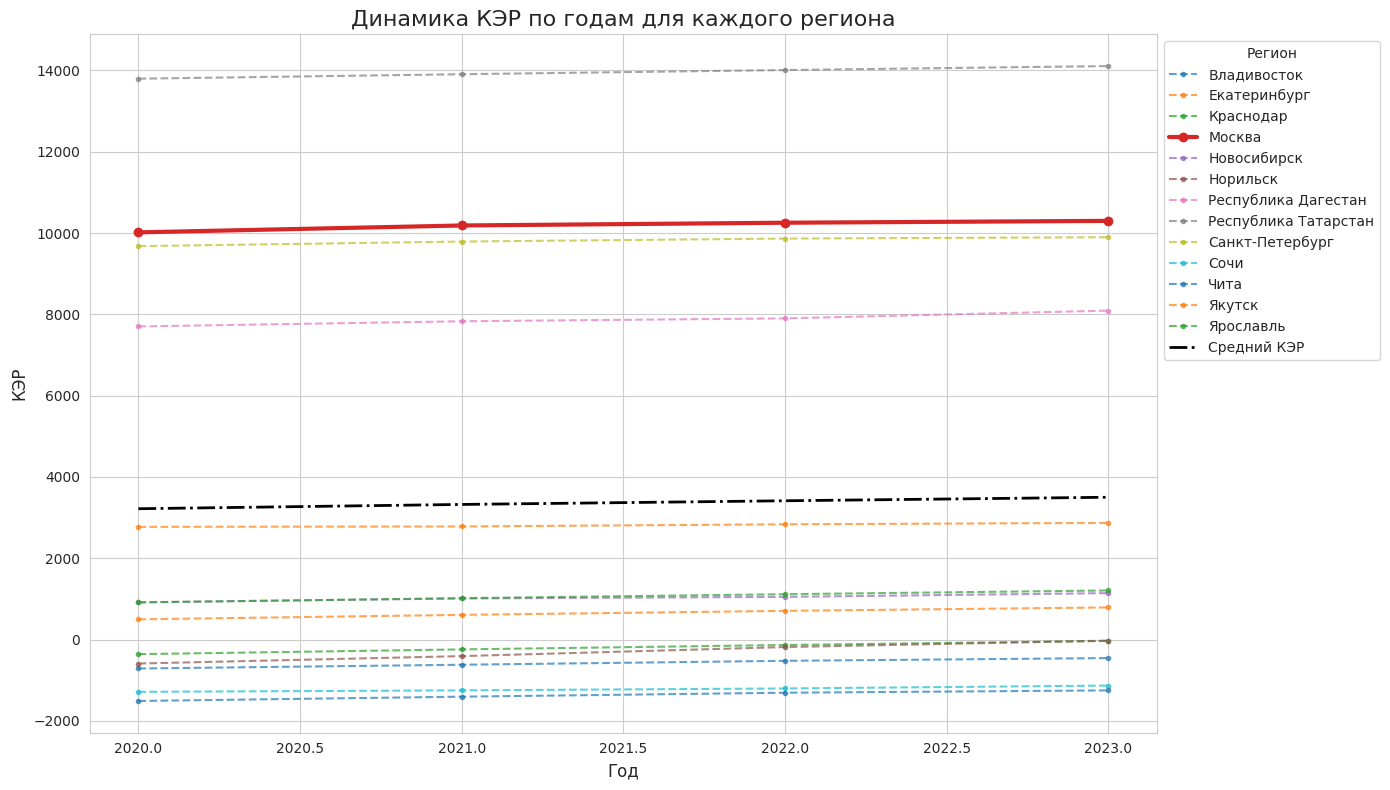

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_sorted = df.sort_values(by="Год")

ker_pivot = df_sorted.pivot_table(index="Год", columns="Регион", values="КЭР")

mean_ker = ker_pivot.mean(axis=1)

plt.figure(figsize=(14, 8))


for region in ker_pivot.columns:
    if region == "Москва":
        plt.plot(ker_pivot.index, ker_pivot[region], label=region, linewidth=3, marker="o")
    else:
        plt.plot(ker_pivot.index, ker_pivot[region], label=region, alpha=0.7, linestyle="--", marker=".")


plt.plot(mean_ker.index, mean_ker, label="Средний КЭР", color="black", linewidth=2, linestyle="-.")

plt.title("Динамика КЭР по годам для каждого региона", fontsize=16)
plt.xlabel("Год", fontsize=12)
plt.ylabel("КЭР", fontsize=12)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Регион")
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
delta_1, delta_2, delta_3 = 1/3, 1/3, 1/3
df["ΔСправедливость"] = 1 / df.groupby("Год")["КЭР"].transform(lambda x: x.var())

df["ΔСтабильность"] = 1 - df["M (уровень миграционного оттока, тыс. чел.)"]

df["ME_norm"] = df["ME"] / df["ME"].abs().max()
df["ΔСправедливость_norm"] = df["ΔСправедливость"] / df["ΔСправедливость"].abs().max()
df["ΔСтабильность_norm"] = df["ΔСтабильность"] / df["ΔСтабильность"].abs().max()

df["SI"] = (
    delta_1 * df["ME_norm"] +
    delta_2 * df["ΔСправедливость_norm"] +
    delta_3 * df["ΔСтабильность_norm"]
)


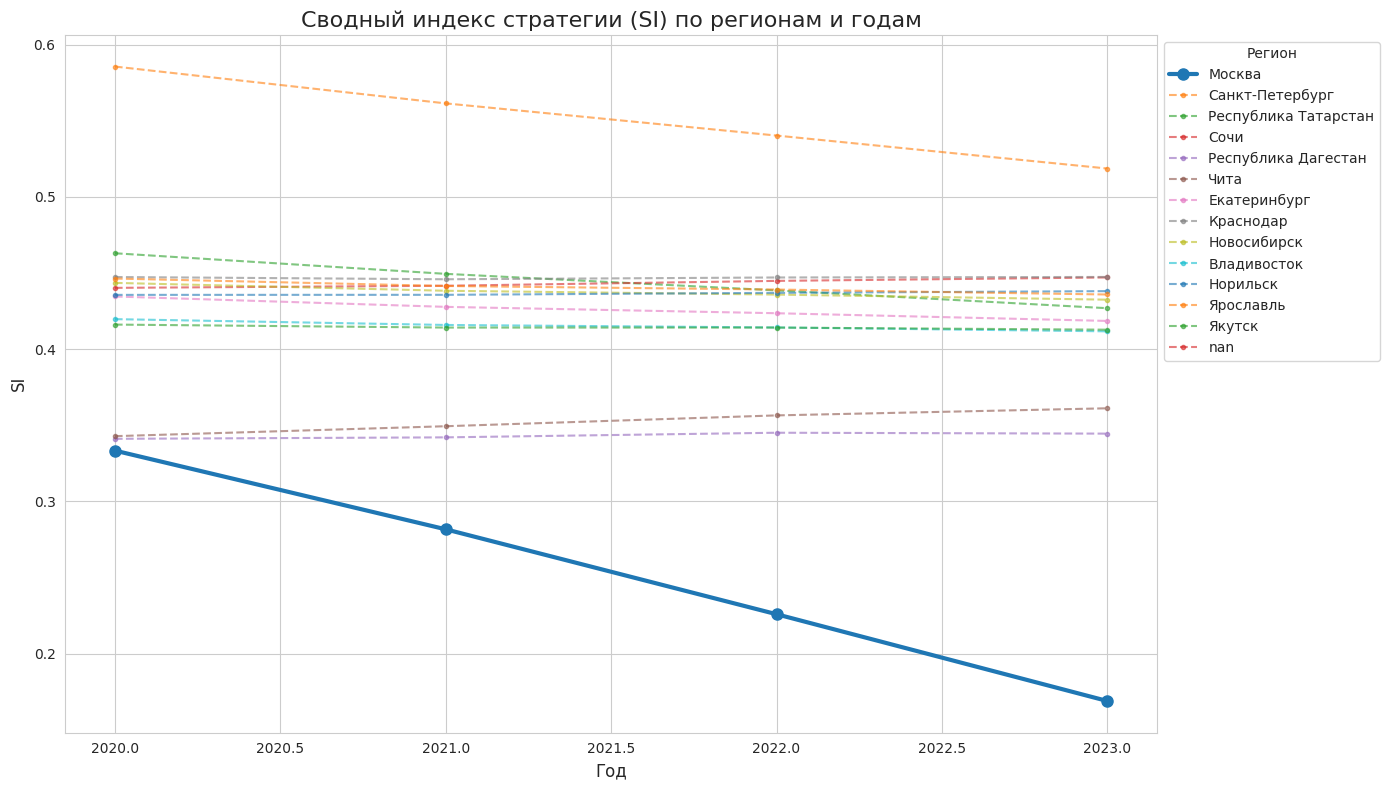

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

for region in df["Регион"].unique():
    subset = df[df["Регион"] == region]
    if region == "Москва":
        plt.plot(subset["Год"], subset["SI"], label=region, linewidth=3, marker="o", markersize=8)
    else:
        plt.plot(subset["Год"], subset["SI"], label=region, alpha=0.6, linestyle="--", marker=".")

plt.title("Сводный индекс стратегии (SI) по регионам и годам", fontsize=16)
plt.xlabel("Год", fontsize=12)
plt.ylabel("SI", fontsize=12)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Регион")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-70-1843468910>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Регион", y="delta_KER", data=var_ker_by_region, palette="viridis")


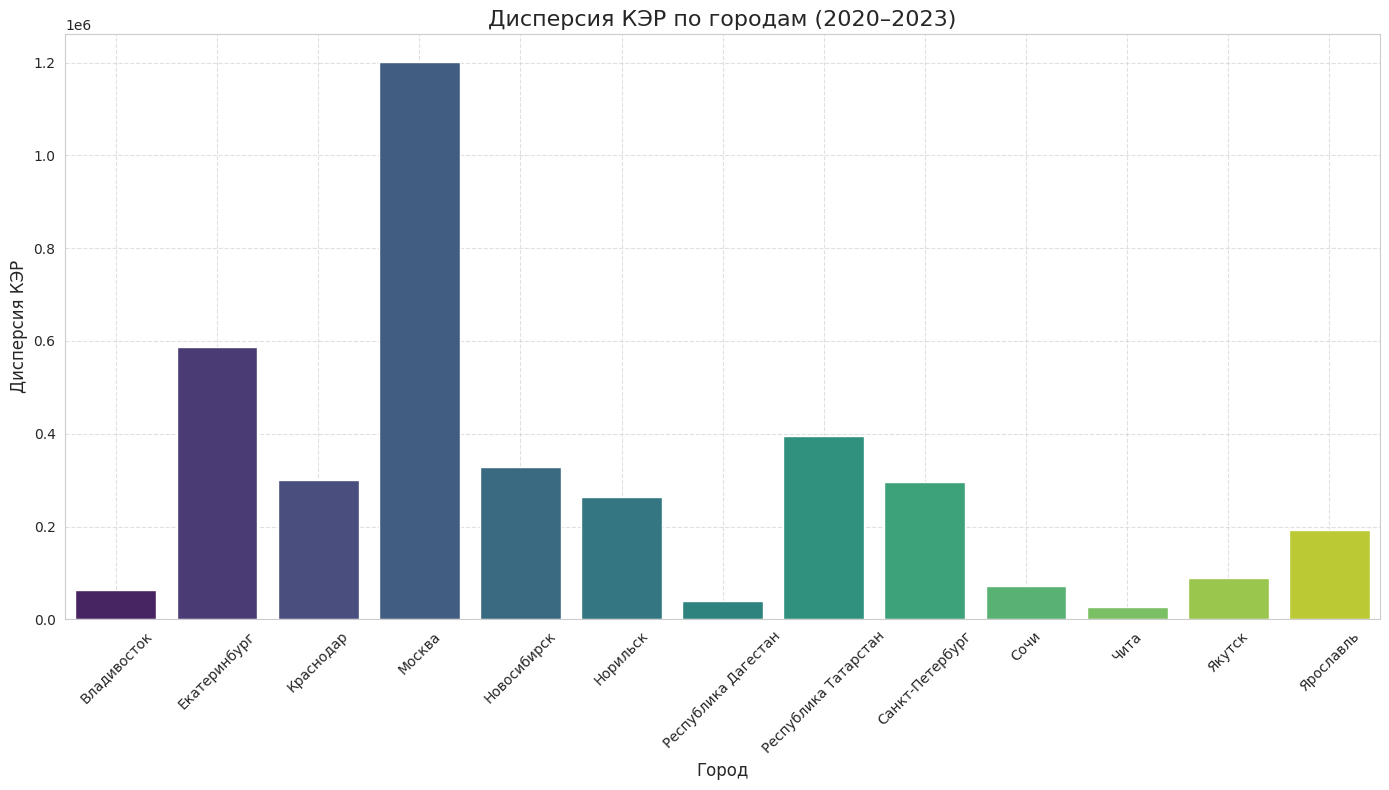

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
var_ker_by_region = df.groupby("Регион")["delta_KER"].var().reset_index()

# --- Столбчатый график ---
plt.figure(figsize=(14, 8))
sns.barplot(x="Регион", y="delta_KER", data=var_ker_by_region, palette="viridis")
plt.xticks(rotation=45)
plt.title("Дисперсия КЭР по городам (2020–2023)", fontsize=16)
plt.xlabel("Город", fontsize=12)
plt.ylabel("Дисперсия КЭР", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()